# Multiple Linear Regression 

**Problem Statement:**

Using Linear Regression to advise a (fake) Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


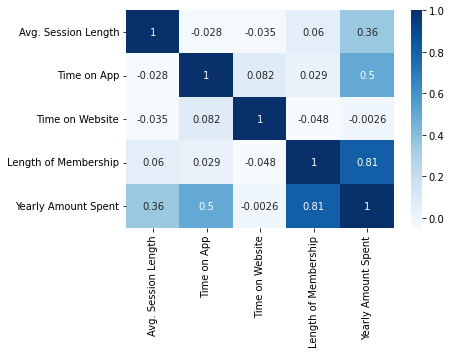

In [5]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)


In [6]:
X = df[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [13]:
lr.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [14]:
lr.score(X,y) #r2 value

0.9842727142336021

In [15]:
y_pred=lr.predict(X_test)

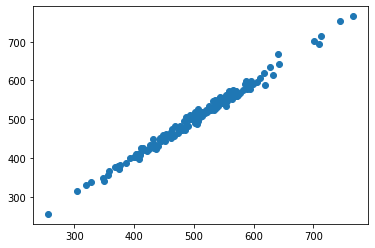

In [16]:
plt.scatter(y_test,y_pred)


In [17]:
from sklearn import metrics

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Root Mean Squared Error: 8.933815066978624


Text(0.5, 0, 'Yearly Amount Spent')

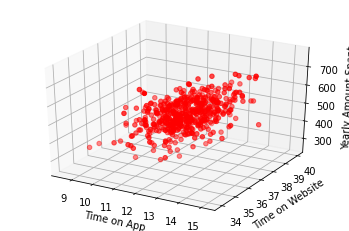

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = X["Time on App"]
x2 = X["Time on Website"]

ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('Time on App')
ax.set_ylabel('Time on Website')
ax.set_zlabel('Yearly Amount Spent')

Adding a surface to the visualization:

In [25]:
X1=df[['Time on App','Time on Website']]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


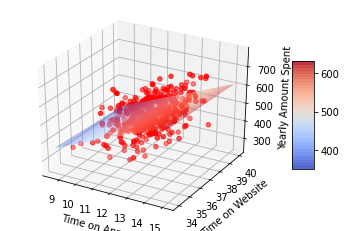

In [26]:
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the x and y meshgrid for the surface
X_surf, Y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), 
                             np.linspace(x2.min(), x2.max(), 100))

# Fit the multiple linear regression model to the data
model = LinearRegression()
model.fit(X1, y)

# Use the model to predict the z-values for the surface
Z_surf = model.predict(np.c_[X_surf.ravel(), Y_surf.ravel()])
Z_surf = Z_surf.reshape(X_surf.shape)

# Add the surface to the plot
surf = ax.plot_surface(X_surf, Y_surf, Z_surf, cmap=cm.coolwarm, alpha=0.5)

# Add the scatter plot
ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('Time on App')
ax.set_ylabel('Time on Website')
ax.set_zlabel('Yearly Amount Spent')

# Add a colorbar for the surface
fig.colorbar(surf, shrink=0.5, aspect=5)

In [27]:
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coefficient']
coeffecients

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Since the correlation is maximum with Time On App and minimum with time on website, hence the company should either focus on optimizing their app to increase revenue, or focus the attention on website for improvement